In [ ]:
import pandas as pd   #==  import pandas library to data manupulation and analisis  ===
import numpy as np   #== numpy library for numaric operations ==
import matplotlib.pyplot as plt # == for creating and visualization like charts ==
import seaborn as sns #== used for build highlevel graphs ==
from sklearn.model_selection import train_test_split # == used to split a dataset into training and testing sets. ==
from sklearn.preprocessing import StandardScaler #This is useful for getting a deeper understanding of your model's performance on each class.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix#A confusion matrix provides a more comprehensive picture of the model performance by showing the number of true positives, true negatives, false positives, and false negatives.
import joblib # Joblib is useful for saving a trained model to disk and loading it later for making predictions.


In [ ]:
from google.colab import files


In [ ]:
# ==Upload your CSV file ==
uploaded = files.upload()

Saving heart_attack_prediction_dataset.csv to heart_attack_prediction_dataset.csv


In [ ]:
import io # ==library provides the basic tools for working with data streams


In [ ]:
# ==Read the uploaded CSV file into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['heart_attack_prediction_dataset.csv']))
df.head()  # ==View the first few rows
df.info()  # ==Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
# Handle missing data
df.fillna(method='ffill', inplace=True)  # ==operations will be performed on dataFrame It self

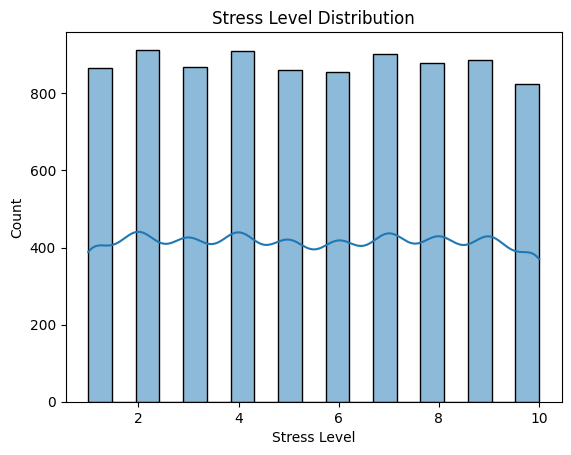

In [ ]:
sns.histplot(df['Stress Level'], kde=True)  # ==histogram using smooth
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier  # ==Random Forest Classifier  BEST FOR HANDLE  COMPLEX RELATIONSHIPS #(handling complex relationships in data )
model = RandomForestClassifier()

In [ ]:
# == Example: One-hot encoding and splitting the data used to convert categorical variables in to binary
df_encoded = pd.get_dummies(df.drop(['Heart Attack Risk', 'Patient ID'], axis=1), columns=['Age','Sex', 'Blood Pressure', 'Diet','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Exercise Hours Per Week','Diet','Previous Heart Problems','Medication Use','Stress Level','Sedentary Hours Per Day','Income','BMI','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day'])
X = df_encoded
y = df['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #split data into training


In [ ]:
# ==train the machine learning model using trainiing data  x input y target vectors
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  #use to make predictions on new or unseen data


In [ ]:
# == Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)  # ==includes precision recall f1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# ==Displaying results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 0.6418

Confusion Matrix:
[[1125    0]
 [ 628    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



In [ ]:
# Example of new data with high levels for most features
new_input= {
    'Age': 65,  # Higher age
    'Sex': 'Male',  # Assuming male is a higher risk
    'Cholesterol': 300,  # High cholesterol level
    'Blood Pressure': 2.0,  # High blood pressure (normalized)
    'Max Heart Rate': 50,  # Lower max heart rate (indicator of possible heart problems)
    'Exercise Induced Angina': 1,  # Presence of exercise-induced angina
    'Family History': 1,  # Positive family history of heart disease
    'Smoking': 1,  # Smoker
    'Obesity': 1,  # Obese
    'Alcohol Consumption': 1,  # High alcohol consumption
    'Exercise Hours Per Week': 0,  # No exercise
    'Diet_Healthy': 0,  # Unhealthy diet
    'Diet_Unhealthy': 1,  # Unhealthy diet
    'Previous Heart Problems': 1,  # History of heart problems
    'Medication Use': 1,  # Using medication
    'Stress Level': 9,  # High stress level
    'Sedentary Hours Per Day': 12,  # High sedentary time
    'Income': 300000,  # High income (assuming this could be linked to higher stress, etc.)
    'BMI': 35.0,  # High BMI
    'Triglycerides': 300,  # High triglycerides
    'Physical Activity Days Per Week': 0,  # No physical activity
    'Sleep Hours Per Day': 4,  # Low sleep hours
}


In [ ]:
# == Create a DataFrame with the new input
new_input_df = pd.DataFrame([new_input])

In [ ]:
# == Ensure all columns are present in the new input DataFrame and Add missing columns with value 0
missing_columns = set(X_train.columns) - set(new_input_df.columns)
for column in missing_columns:
    new_input_df[column] = 0  # Add missing columns with value 0

Streaming output truncated to the last 5000 lines.
<ipython-input-19-5c7c37a6a41f>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_df[column] = 0  # Add missing columns with value 0
<ipython-input-19-5c7c37a6a41f>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_df[column] = 0  # Add missing columns with value 0
<ipython-input-19-5c7c37a6a41f>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

In [ ]:
# == Reorder columns to match the order during training
new_input_df = new_input_df[X_train.columns]


In [ ]:
# ==Make predictions
prediction = model.predict(new_input_df)

In [ ]:
# ==Display the prediction
if prediction[0] == 1:
    print("The model predicts a high risk of heart attack.")
else:
    print("The model predicts a low risk of heart attack.")

The model predicts a low risk of heart attack.


In [ ]:
# Save the Model and Columns
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(X_train.columns, 'model_columns.pkl')

# Download the Model Files
files.download('random_forest_model.pkl')
files.download('model_columns.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>